<a href="https://colab.research.google.com/github/avichhitwal/5G-spectrum-auction/blob/main/spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install kaggle

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import kagglehub

path = kagglehub.dataset_download("kautukraj/spectrum-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spectrum-dataset


In [6]:
df = pd.read_csv('/kaggle/input/spectrum-dataset/spectrum.csv')

print(df.head())

   awardId  lotId                                awardName    countryName  \
0       80    660  Auction 1 - Nationwide Narrowband (PCS)  United States   
1       80    661  Auction 1 - Nationwide Narrowband (PCS)  United States   
2       80    662  Auction 1 - Nationwide Narrowband (PCS)  United States   
3       80    663  Auction 1 - Nationwide Narrowband (PCS)  United States   
4       80    664  Auction 1 - Nationwide Narrowband (PCS)  United States   

  alpha3code  nBidders        date            awardClassDescription  \
0        USA      29.0  29-07-1994  Auction - Largely standard SMRA   
1        USA      29.0  29-07-1994  Auction - Largely standard SMRA   
2        USA      29.0  29-07-1994  Auction - Largely standard SMRA   
3        USA      29.0  29-07-1994  Auction - Largely standard SMRA   
4        USA      29.0  29-07-1994  Auction - Largely standard SMRA   

   availableSpectrumPaired  availableSpectrumUnpaired  ...    region  \
0                   0.6875            

In [7]:
# Check for missing values
print(df.isnull().sum())

# Inspect data types of each column
print(df.dtypes)

# Drop rows with missing values (you can also choose to fill missing values)
df = df.dropna()

# Check basic statistics
print(df.describe())


awardId                          0
lotId                            0
awardName                        0
countryName                      0
alpha3code                       0
nBidders                       492
date                             0
awardClassDescription            0
availableSpectrumPaired       1888
availableSpectrumUnpaired     1411
licenceUse                     318
awardComments                  230
lotName                        609
winner                          95
freqBand                        13
nationalLicence                  0
region                          98
blockFreq                    22570
paired                        1514
unpaired                      1464
licenceDuration                233
popCovered                     342
reservePriceLocal              260
headlinePriceLocal             197
entrantReserved                273
lotComments                  26509
dtype: int64
awardId                        int64
lotId                          int64
awa

In [9]:
print(df.columns)


Index(['awardId', 'lotId', 'awardName', 'countryName', 'alpha3code',
       'nBidders', 'date', 'awardClassDescription', 'availableSpectrumPaired',
       'availableSpectrumUnpaired', 'licenceUse', 'awardComments', 'lotName',
       'winner', 'freqBand', 'nationalLicence', 'region', 'blockFreq',
       'paired', 'unpaired', 'licenceDuration', 'popCovered',
       'reservePriceLocal', 'headlinePriceLocal', 'entrantReserved',
       'lotComments'],
      dtype='object')


In [10]:
# Calculate the average price for each frequency band
avg_price_by_band = df.groupby('freqBand')['headlinePriceLocal'].mean()
print(avg_price_by_band)


freqBand
1500MHz                               2.311635e+08
1700/2100MHz                          1.443696e+08
1700MHz                               6.944365e+06
1700MHz,2.1GHz                        3.369998e+07
1700MHz,2100MHz                       1.876944e+08
1700MHz/2100MHz                       4.218295e+08
1700Mhz, 2100MHz                      2.477000e+08
1800 MHz                              3.763446e+08
1800MHz                               2.280238e+10
1800MHz and 1900MHz                   1.874042e+08
1800_MHz                              5.500000e+05
1900MHz                               1.775015e+08
2 GHz                                 2.798000e+06
2.1 GHz                               2.999949e+08
2.1GHz                                4.039207e+09
2.3 GHz                               3.352283e+07
2.5GHz                                3.120000e+06
2.6 GHz                               1.509143e+08
2.6GHz                                1.232161e+10
2100 MHz              

In [14]:
# Calculate the average price by region
avg_price_by_region = df.groupby('region')['reservePriceLocal'].mean()
print("\nAverage Price by Region:\n", avg_price_by_region)



Average Price by Region:
 region
1                         5300000.0
2                          800000.0
3                         3400000.0
4                        16500000.0
5                          400000.0
                            ...    
Yakima, WA                  67000.0
York, PA                   201000.0
Youngstown-Warren, OH      169000.0
Yuba City, CA               46000.0
multiple regions         27615400.0
Name: reservePriceLocal, Length: 979, dtype: float64


In [21]:
df.columns = df.columns.str.strip().str.lower()

In [22]:
auction_counts = df['region'].value_counts()
top_regions = auction_counts[auction_counts >= 5].index
df_filtered = df[df['region'].isin(top_regions)]

In [23]:
Q1 = df_filtered['reservepricelocal'].quantile(0.25)
Q3 = df_filtered['reservepricelocal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

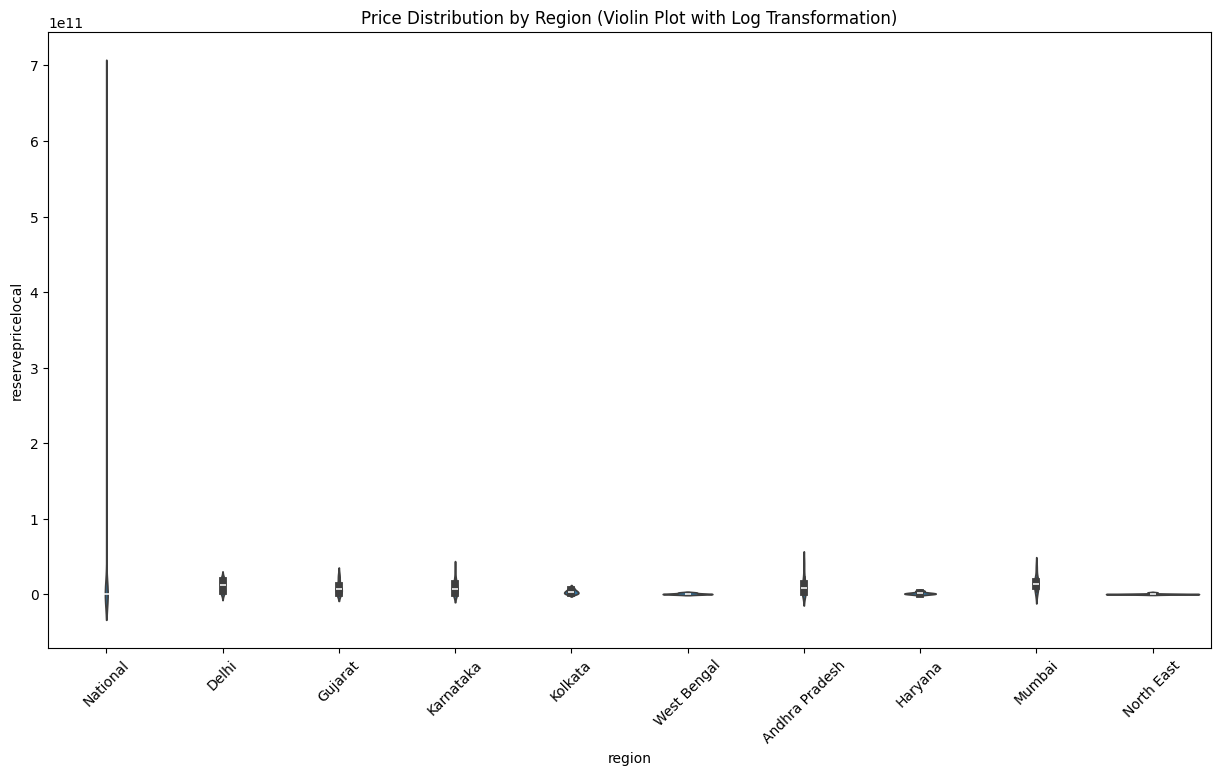

In [30]:
df_filtered_no_outliers = df_filtered[(df_filtered['reservepricelocal'] >= lower_bound) & (df_filtered['reservepricelocal'] <= upper_bound)]

# Step 5: Horizontal Boxplot (for better readability)
plt.figure(figsize=(15, 8))
sns.violinplot(x='region', y='reservepricelocal', data=df_top_10)
plt.title('Price Distribution by Region (Violin Plot with Log Transformation)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

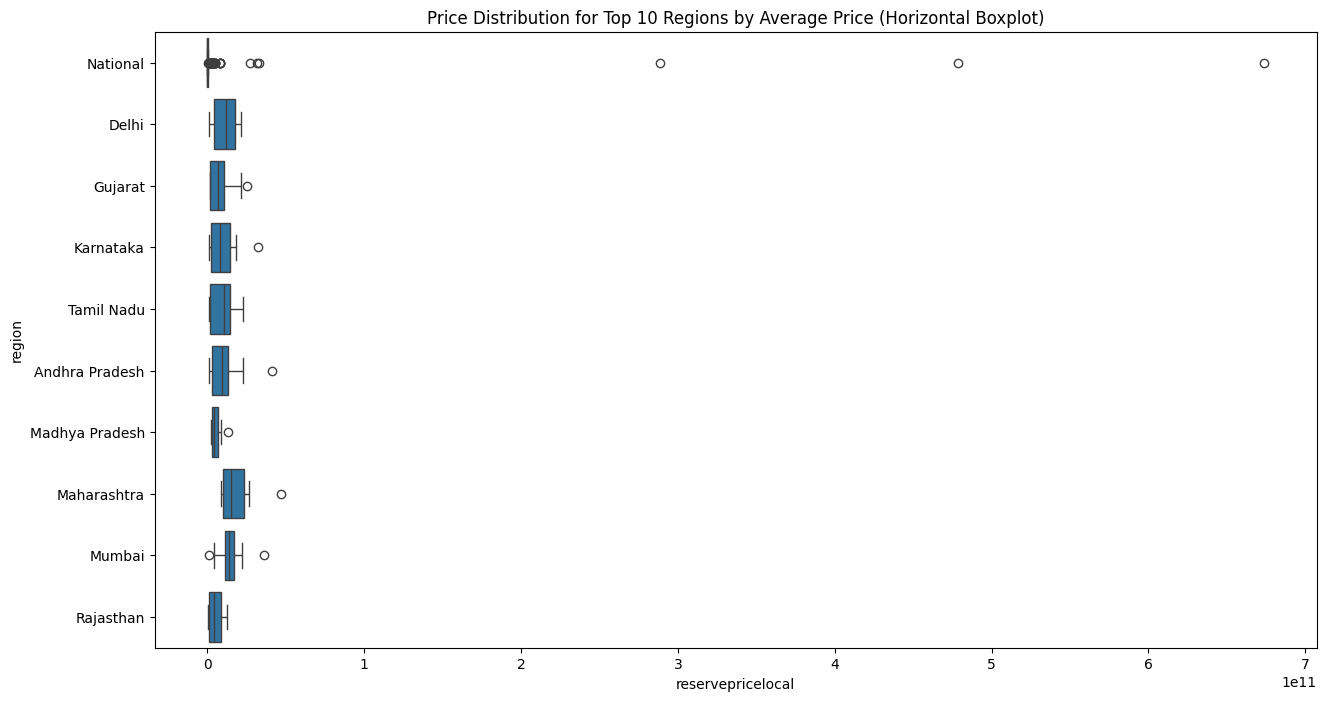

In [31]:
top_10_regions_by_price = df_filtered.groupby('region')['reservepricelocal'].mean().sort_values(ascending=False).head(10).index
df_top_10_by_price = df_filtered[df_filtered['region'].isin(top_10_regions_by_price)]

# Step 7: Horizontal Boxplot for Top 10 Regions by Price (Optional)
plt.figure(figsize=(15, 8))
sns.boxplot(x='reservepricelocal', y='region', data=df_top_10_by_price)
plt.title('Price Distribution for Top 10 Regions by Average Price (Horizontal Boxplot)')
plt.show()